In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os
import numpy as np
import pickle

In [87]:
def draw_significance_bar(x1, x2, height, significance_level, ax):
    """
    Draw a bar with annotations to indicate significance level. Adds "n.s." for non-significant relationships.
    """
    # Draw the bar
    ax.plot([x1, x1, x2, x2], [height, height + 0.05, height + 0.05, height], lw=1.5, c='black')
    
    # Determine significance and annotate
    if significance_level < 0.001:
        annotation = '***'  # Highly significant
    elif significance_level < 0.01:
        annotation = '**'  # Very significant
    elif significance_level < 0.05:
        annotation = '*'  # Significant
    else:
        annotation = 'n.s.'  # Not significant
    
    # Add text annotation for significance
    ax.text((x1 + x2) * 0.5, height + 0.06, annotation, ha='center', va='bottom', color='black')


def create_box_plots_with_significance(df,xlabel,ylabel, pairs, ylim=None, title="Custom Box Plots with Significance Indication", x_tick_label_column=None):
    """

    """
    num_boxes = len(df)
    fig, ax = plt.subplots(figsize=(10, 6))
    positions = range(1, num_boxes + 1)
    
    x_tick_labels=None
    if x_tick_label_column == None:
         x_tick_labels= positions
    else:
        x_tick_labels=df[x_tick_label_column]
    
    for i, (index, row) in enumerate(df.iterrows()):
        q1, median, q3 = row['25%'], row['50%'], row['75%']
        min_val, max_val = row['min'], row['max']
        mean, std = row['mean'], row['stdev']
        
        ax.boxplot([min_val, q1, median, q3, max_val], positions=[positions[i]], widths=0.5, showcaps=False, manage_ticks=False)
        ax.plot(positions[i], mean, 'ro')  # Plot the mean as a point
        
    ax.set_xticks(positions)
    ax.set_xticklabels(x_tick_labels)
    plt.xticks(rotation=45, ha='right')
    
    if ylim != None:
        plt.ylim(0,ylim)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    max_height = df['max'].max() + df['stdev'].max()  # Starting height for significance bars
    
    # Perform t-tests and add significance bars
    for pair in pairs:
        sample1, sample2 = df.iloc[pair[0]], df.iloc[pair[1]]
        t_stat, p_val = stats.ttest_ind_from_stats(mean1=sample1['mean'], std1=sample1['stdev'], nobs1=sample1['n'],
                                                   mean2=sample2['mean'], std2=sample2['stdev'], nobs2=sample2['n'],
                                                   equal_var=False)
        
        draw_significance_bar(positions[pair[0]], positions[pair[1]], max_height, p_val, ax)
        max_height += 0.3  # Increment height for next significance bar to avoid overlap

    plt.show()


In [66]:
# Define the directory to search in
directory = "pickles"

# List all files in the directory ending with .pkl
pkl_files = [file for file in os.listdir(directory) if file.endswith('.pkl')]

#for each, extract the contents & add to a growing dictionary

data=[]

for file in pkl_files:
    working=None
    with open("pickles/"+file, 'rb') as file:
        working = pickle.load(file)
    data.append(working)
    

transformed_data = [{k: v[0] for k, v in row.items()} for row in data]

# Convert to a pandas DataFrame
df = pd.DataFrame(transformed_data)

lists_expanded = df['quartiles'].apply(pd.Series)
lists_expanded.columns = ['25%', '50%', '75%']
df = df.join(lists_expanded)
df.drop('quartiles', axis=1, inplace=True)


/tmp/ipykernel_3533335/3481470997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[columns_to_transform] = np.log10(temp[columns_to_transform])


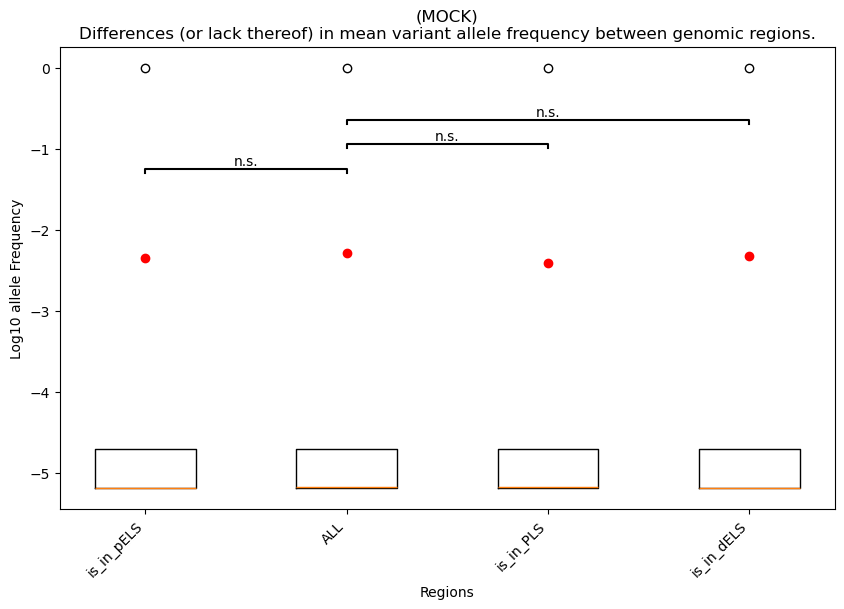

In [90]:
temp=df.iloc[[0,2,3,9]]
columns_to_transform = df.columns.difference(["tropy","region"])
temp[columns_to_transform] = np.log10(temp[columns_to_transform])
create_box_plots_with_significance(temp,xlabel="Regions",title="(MOCK)\nDifferences (or lack thereof) in mean variant allele frequency between genomic regions.",ylabel="Log10 allele Frequency",x_tick_label_column="region",pairs=[(0,1),(1,2),(1,3)])

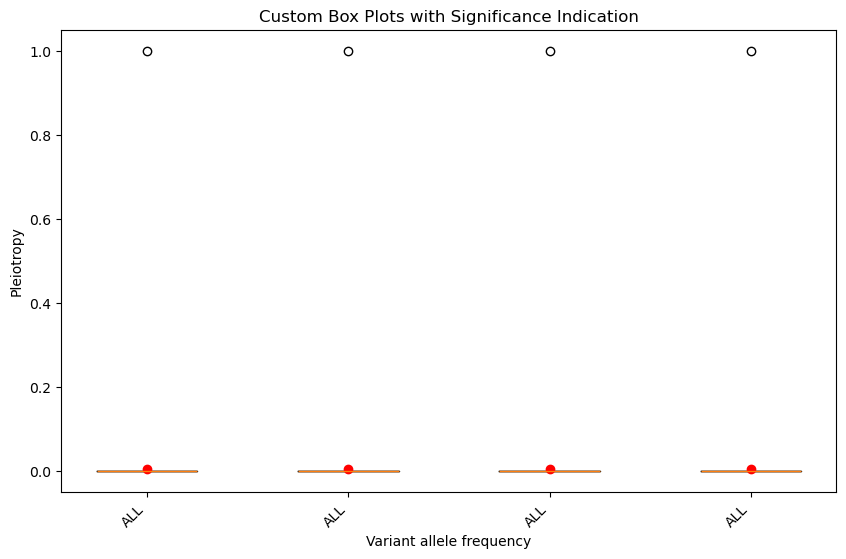

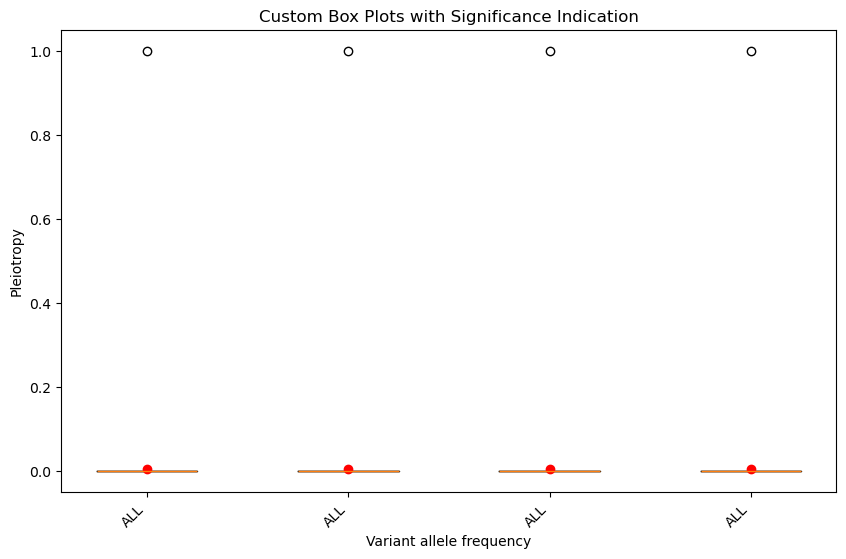

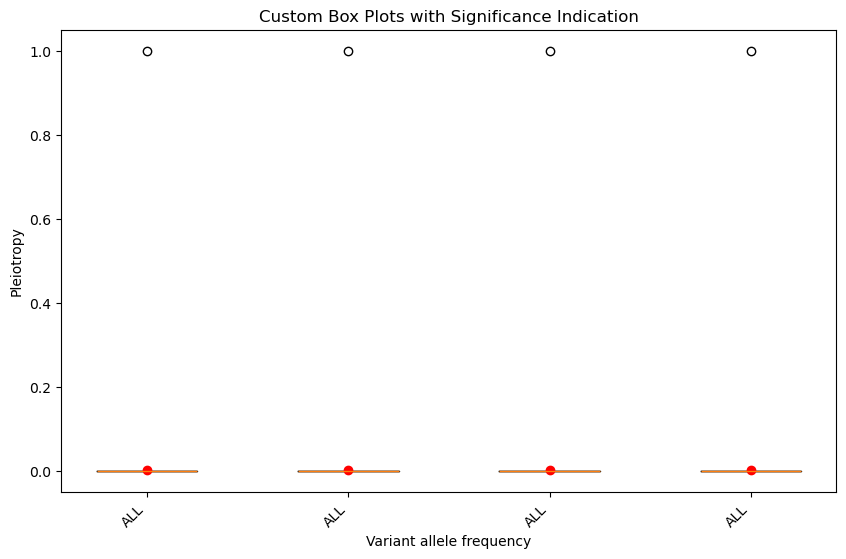

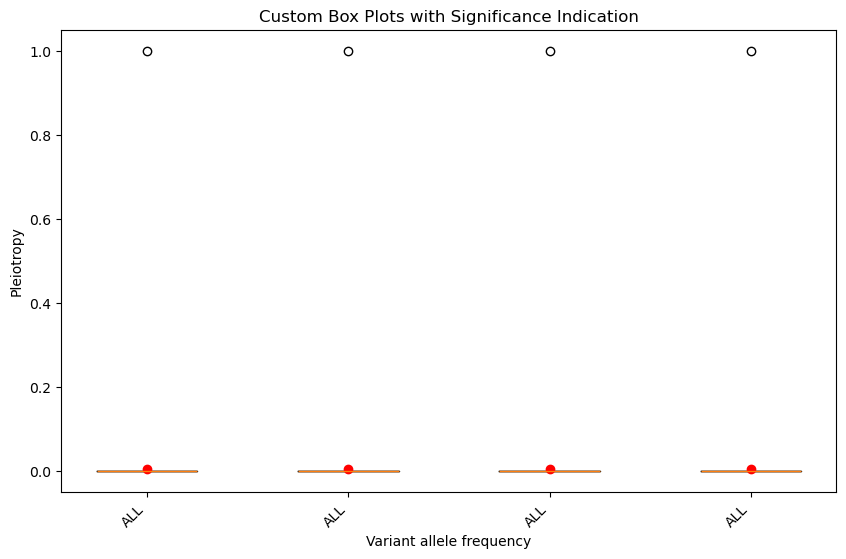

In [42]:
for region in df["region"].unique():
    subset=df[df["region"]==region]
    #put graphing here ...

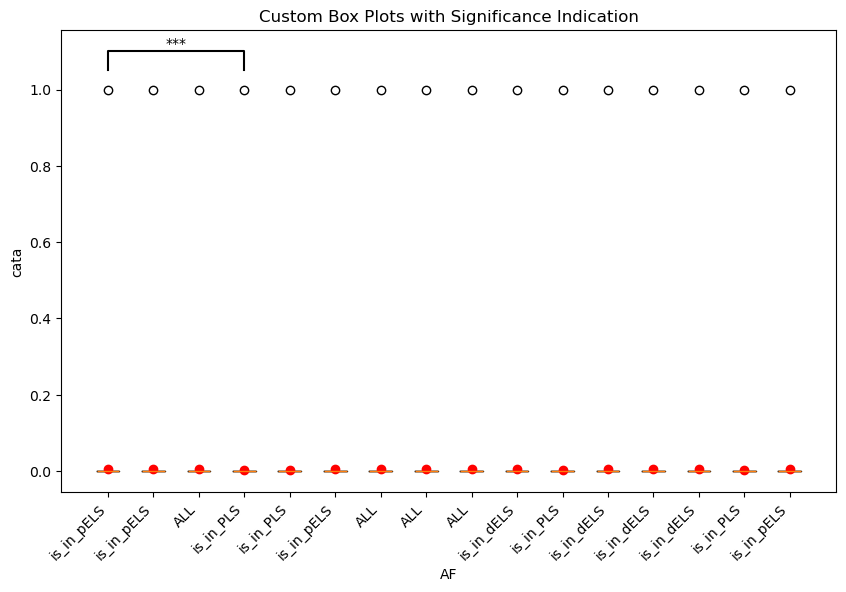

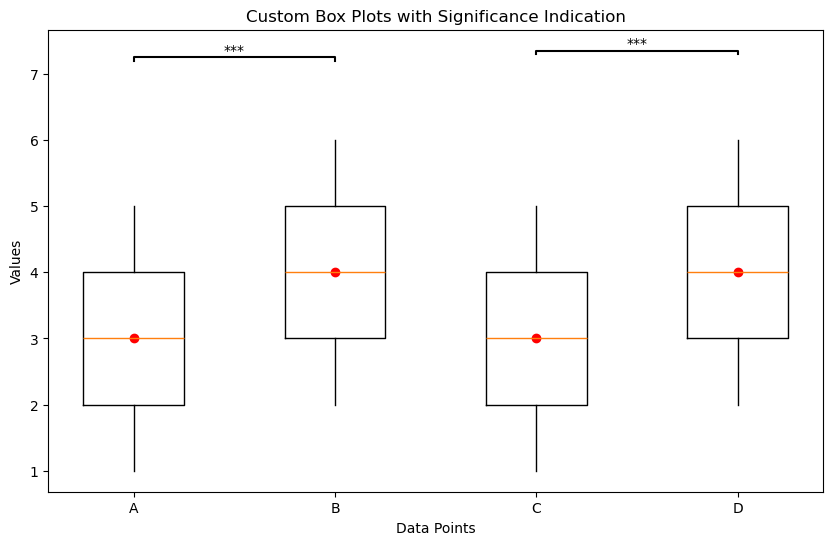

In [13]:
# Example usage
data = {
    'Min': [1, 2, 1, 2],
    '25%': [2, 3, 2, 3],
    '50%': [3, 4, 3, 4],
    '75%': [4, 5, 4, 5],
    'Max': [5, 6, 5, 6],
    'Mean': [3, 4, 3, 4],
    'Std': [1, 1.2, 1, 1.1],
    'Nobs': [30, 30, 30, 30],
}
df = pd.DataFrame(data)
df.index = ['A', 'B', 'C', 'D']
pairs = [(0, 1), (2, 3)]  # Indicate which pairs to test

create_box_plots_with_significance(df, pairs)